In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import ast

# Read the data

In [20]:
data = pd.read_csv('data.csv')

In [21]:
data.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,x7mDIiDB3jEiPGPHOmDzyw,msQe1u7Z_XuqjGoqhB0J5g,iCQpiavjjPzJ5_3gPD5Ebg,2,2011-02-25,The pizza was okay. Not the best I've had. I p...,0,0,0
1,dDl8zu1vWPdKGihJrwQbpw,msQe1u7Z_XuqjGoqhB0J5g,pomGBqfbxcqPv14c3XH-ZQ,5,2012-11-13,I love this place! My fiance And I go here atl...,0,0,0
2,LZp4UX5zK3e-c5ZGSeo3kA,msQe1u7Z_XuqjGoqhB0J5g,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,Terrible. Dry corn bread. Rib tips were all fa...,3,1,1
3,Er4NBWCmCD4nM8_p1GRdow,msQe1u7Z_XuqjGoqhB0J5g,elqbBhBfElMNSrjFqW3now,2,2011-02-25,Back in 2005-2007 this place was my FAVORITE t...,2,0,0
4,jsDu6QEJHbwP2Blom1PLCA,msQe1u7Z_XuqjGoqhB0J5g,Ums3gaP2qM3W1XcA5r6SsQ,5,2014-09-05,Delicious healthy food. The steak is amazing. ...,0,0,0


# Analyzing the data

In [22]:
data['stars'].value_counts(sort=False)

1    117
2     85
3    173
4    263
5    362
Name: stars, dtype: int64

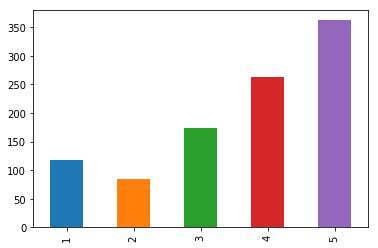

In [23]:
data['stars'].value_counts(sort=False).plot.bar()

From the graph we can conclude that the given data has more positive reviews than negative reviews.

# Assigning sentiments

We will be assigning positive sentiment to reviews having stars more than 3 and negative sentiment to reviews having stars less than 3. We will eliminate records having 3 stars

### Let's remove all the reviews which contain 3 stars

In [24]:
data = data[data['stars'] != 3]

In [25]:
len(data)

827

In [26]:
data.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,x7mDIiDB3jEiPGPHOmDzyw,msQe1u7Z_XuqjGoqhB0J5g,iCQpiavjjPzJ5_3gPD5Ebg,2,2011-02-25,The pizza was okay. Not the best I've had. I p...,0,0,0
1,dDl8zu1vWPdKGihJrwQbpw,msQe1u7Z_XuqjGoqhB0J5g,pomGBqfbxcqPv14c3XH-ZQ,5,2012-11-13,I love this place! My fiance And I go here atl...,0,0,0
2,LZp4UX5zK3e-c5ZGSeo3kA,msQe1u7Z_XuqjGoqhB0J5g,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,Terrible. Dry corn bread. Rib tips were all fa...,3,1,1
3,Er4NBWCmCD4nM8_p1GRdow,msQe1u7Z_XuqjGoqhB0J5g,elqbBhBfElMNSrjFqW3now,2,2011-02-25,Back in 2005-2007 this place was my FAVORITE t...,2,0,0
4,jsDu6QEJHbwP2Blom1PLCA,msQe1u7Z_XuqjGoqhB0J5g,Ums3gaP2qM3W1XcA5r6SsQ,5,2014-09-05,Delicious healthy food. The steak is amazing. ...,0,0,0


### Let's assign positive or negative sentiments

In [27]:
data['sentiments'] = data['stars'] >= 4

In [28]:
data.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,sentiments
0,x7mDIiDB3jEiPGPHOmDzyw,msQe1u7Z_XuqjGoqhB0J5g,iCQpiavjjPzJ5_3gPD5Ebg,2,2011-02-25,The pizza was okay. Not the best I've had. I p...,0,0,0,False
1,dDl8zu1vWPdKGihJrwQbpw,msQe1u7Z_XuqjGoqhB0J5g,pomGBqfbxcqPv14c3XH-ZQ,5,2012-11-13,I love this place! My fiance And I go here atl...,0,0,0,True
2,LZp4UX5zK3e-c5ZGSeo3kA,msQe1u7Z_XuqjGoqhB0J5g,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,Terrible. Dry corn bread. Rib tips were all fa...,3,1,1,False
3,Er4NBWCmCD4nM8_p1GRdow,msQe1u7Z_XuqjGoqhB0J5g,elqbBhBfElMNSrjFqW3now,2,2011-02-25,Back in 2005-2007 this place was my FAVORITE t...,2,0,0,False
4,jsDu6QEJHbwP2Blom1PLCA,msQe1u7Z_XuqjGoqhB0J5g,Ums3gaP2qM3W1XcA5r6SsQ,5,2014-09-05,Delicious healthy food. The steak is amazing. ...,0,0,0,True


### Replace True or False with 0 or 1

In [29]:
data['sentiments'] = data['sentiments'].astype(int)

In [30]:
data.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,sentiments
0,x7mDIiDB3jEiPGPHOmDzyw,msQe1u7Z_XuqjGoqhB0J5g,iCQpiavjjPzJ5_3gPD5Ebg,2,2011-02-25,The pizza was okay. Not the best I've had. I p...,0,0,0,0
1,dDl8zu1vWPdKGihJrwQbpw,msQe1u7Z_XuqjGoqhB0J5g,pomGBqfbxcqPv14c3XH-ZQ,5,2012-11-13,I love this place! My fiance And I go here atl...,0,0,0,1
2,LZp4UX5zK3e-c5ZGSeo3kA,msQe1u7Z_XuqjGoqhB0J5g,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,Terrible. Dry corn bread. Rib tips were all fa...,3,1,1,0
3,Er4NBWCmCD4nM8_p1GRdow,msQe1u7Z_XuqjGoqhB0J5g,elqbBhBfElMNSrjFqW3now,2,2011-02-25,Back in 2005-2007 this place was my FAVORITE t...,2,0,0,0
4,jsDu6QEJHbwP2Blom1PLCA,msQe1u7Z_XuqjGoqhB0J5g,Ums3gaP2qM3W1XcA5r6SsQ,5,2014-09-05,Delicious healthy food. The steak is amazing. ...,0,0,0,1


# Preprocessing data

In [31]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
filtered_text = []
for index, row in data.iterrows():
    review = re.sub('[^a-zA-Z]', ' ', row['text'])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    filtered_text.append(review)

In [32]:
filtered_text

['pizza okay best prefer biaggio flamingo fort apach chef make much better ny style pizza pizzeria cosmo price qualiti lack person food biaggio much better pick your go italian famili own home made recip peopl actual care like food dont get pizzeria casino dont care say',
 'love place fianc go atleast week portion huge food amaz love carn asada great lunch special leticia super nice care think restaur tri chees enchilada sauc differ amaz',
 'terribl dri corn bread rib tip fat mushi flavor want bbq neighborhood go john mull roadkil grill trust',
 'back place favorit thai place ever go alllll time never complaint start get known got busi servic start suck portion size got cut half huge problem pay way less food last time went pork pad se ew tast good finish plate still hungri use know manag would greet hello melissa nice see diet coke pad thai pad se ew day know still know disregard presenc also ask new portion size answer great food worth money havent back year refus pay dinner still hu

# Vectorization

In [33]:
# Creating the Bag of Words model using CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(filtered_text).toarray()
y = data.iloc[:, -1].values

# Training and Classification

## Splitting the dataset into train and test

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model

In [35]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)

## Analyzing the result

In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print ("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[ 22  21]
 [  5 118]]


In [37]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test, predictions)
score2 = precision_score(y_test, predictions)
score3= recall_score(y_test, predictions)
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Accuracy is  84.34 %
Precision is  0.85
Recall is  0.96


# Multinomial Naive Bayes 

In [38]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(x_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [39]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [40]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[ 25  18]
 [  6 117]]


## Analyzing the result

In [41]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))



Accuracy is  85.54 %
Precision is  0.87
Recall is  0.95


# Bernoulli Naive Bayes

In [42]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB(alpha=0.1)
classifier.fit(x_train, y_train)

BernoulliNB(alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True)

In [43]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [44]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[ 25  18]
 [  5 118]]


## Analyzing the result

In [45]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))



Accuracy is  86.14 %
Precision is  0.87
Recall is  0.96


# Preprocessing data based on manually created stopwords

In [46]:
stopwords_file = open('stopwords.txt','r')
stopwords=[]
for line in stopwords_file:
    line = line.strip('\n')
    stopwords.append(line)
stopwords= set(stopwords)
stopwords

{'a',
 'about',
 'above',
 'across',
 'after',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'among',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyone',
 'anything',
 'anywhere',
 'are',
 'area',
 'areas',
 'around',
 'as',
 'ask',
 'asked',
 'asking',
 'asks',
 'at',
 'away',
 'b',
 'back',
 'backed',
 'backing',
 'backs',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'been',
 'before',
 'began',
 'behind',
 'being',
 'beings',
 'best',
 'between',
 'big',
 'both',
 'but',
 'by',
 'c',
 'came',
 'can',
 'cannot',
 'case',
 'cases',
 'certain',
 'certainly',
 'clear',
 'clearly',
 'come',
 'could',
 'd',
 'did',
 'differ',
 'different',
 'differently',
 'do',
 'does',
 'done',
 'down',
 'downed',
 'downing',
 'downs',
 'during',
 'e',
 'each',
 'early',
 'either',
 'end',
 'ended',
 'ending',
 'ends',
 'enough',
 'even',
 'evenly',
 'ever',
 'every',
 'everybody',
 'everyone',
 'everything',
 'everywhere',
 'f',
 'face',

In [47]:
filtered_text1 = []
for index, row in data.iterrows():
    review = re.sub('[^a-zA-Z]', ' ', row['text'])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in stopwords]
    review = ' '.join(review)
    filtered_text1.append(review)

In [48]:
filtered_text1

['pizza okay not ve prefer biaggio flamingo fort apach chef better ny style pizza pizzeria cosmo price qualiti lack person food biaggio better pick your italian famili own home recip peopl actual care food dont pizzeria casino dont care',
 'love fianc atleast week portion huge food amaz love carn asada great lunch special leticia super nice care restaur tri chees enchilada sauc amaz',
 'terribl dri corn bread rib tip fat mushi flavor bbq neighborhood john mull roadkil grill trust',
 'favorit thai alllll time complaint start busi servic start suck portion size cut half huge pay food time pork pad se ew tast finish plate hungri manag greet hello melissa nice again diet coke pad thai pad se ew day disregard presenc portion size answer great food not worth money havent refus pay dinner hungri sorri pinkaow not',
 'delici healthi food steak amaz fish pork awesom servic beyond not bad worth penni',
 'suck custom servic horribl dont serv food unless pizza neighbor restaur dont control crowd t

# Vectorization

In [49]:
# Creating the Bag of Words model using CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(filtered_text1).toarray()

# Training and Classification

## Splitting the dataset into train and test

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model

In [51]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)

## Analyzing the result

In [52]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print ("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[ 24  19]
 [  6 117]]


In [53]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test, predictions)
score2 = precision_score(y_test, predictions)
score3= recall_score(y_test, predictions)
print("\nAccuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))


Accuracy is  84.94 %
Precision is  0.86
Recall is  0.95


# Multinomial Naive Bayes

In [54]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(x_train, y_train)
MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

# Predicting the Test set results
y_pred = classifier.predict(x_test)


## Analyzing the result

In [55]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[ 26  17]
 [  6 117]]


In [56]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test, predictions)
score2 = precision_score(y_test, predictions)
score3= recall_score(y_test, predictions)
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Accuracy is  84.94 %
Precision is  0.86
Recall is  0.95


# Bernoulli Naive Bayes

In [57]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB(alpha=0.7)
classifier.fit(x_train, y_train)

BernoulliNB(alpha=0.7, binarize=0.0, class_prior=None, fit_prior=True)

In [58]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

## Analyzing the result

In [59]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[ 27  16]
 [  4 119]]


In [60]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))



Accuracy is  87.95 %
Precision is  0.88
Recall is  0.97


# Creating functions for models

In [61]:
def logisticModel(x_train, x_test, y_train, y_test):
    logisticRegr = LogisticRegression()
    logisticRegr.fit(x_train, y_train)
    predictions = logisticRegr.predict(x_test)
    cm = confusion_matrix(y_test, predictions)
    print ("Confusion Matrix:\n",cm)
    score1 = accuracy_score(y_test, predictions)
    score2 = precision_score(y_test, predictions)
    score3= recall_score(y_test, predictions)
    print("\nAccuracy is ",round(score1*100,2),"%")
    print("Precision is ",round(score2,2))
    print("Recall is ",round(score3,2))

In [62]:
def bernoulliNBModel(x_train, x_test, y_train, y_test):
    classifier = BernoulliNB(alpha=0.1)
    classifier.fit(x_train, y_train)
    predictions = classifier.predict(x_test)
    cm = confusion_matrix(y_test, predictions)
    print ("Confusion Matrix:\n",cm)
    score1 = accuracy_score(y_test, predictions)
    score2 = precision_score(y_test, predictions)
    score3= recall_score(y_test, predictions)
    print("\nAccuracy is ",round(score1*100,2),"%")
    print("Precision is ",round(score2,2))
    print("Recall is ",round(score3,2))

In [63]:
def multimomialNBModel(x_train, x_test, y_train, y_test):
    classifier = MultinomialNB(alpha=0.9)
    classifier.fit(x_train, y_train)
    MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)
    # Predicting the Test set results
    y_pred = classifier.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    print ("Confusion Matrix:\n",cm)
    score1 = accuracy_score(y_test, predictions)
    score2 = precision_score(y_test, predictions)
    score3= recall_score(y_test, predictions)
    print("Accuracy is ",round(score1*100,2),"%")
    print("Precision is ",round(score2,2))
    print("Recall is ",round(score3,2))

# Vectorizing using tf-idf

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
X_train_tfidf = tfidf_vect.fit_transform(filtered_text1)

# Splitting the train and test dataset

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X_train_tfidf, y, test_size=0.2, random_state=42)

# Results

In [66]:
logisticModel(x_train, x_test, y_train, y_test)

Confusion Matrix:
 [[  1  42]
 [  0 123]]

Accuracy is  74.7 %
Precision is  0.75
Recall is  1.0


In [67]:
multimomialNBModel(x_train, x_test, y_train, y_test)

Confusion Matrix:
 [[  0  43]
 [  0 123]]
Accuracy is  84.94 %
Precision is  0.86
Recall is  0.95


In [68]:
bernoulliNBModel(x_train, x_test, y_train, y_test)

Confusion Matrix:
 [[ 26  17]
 [ 10 113]]

Accuracy is  83.73 %
Precision is  0.87
Recall is  0.92


# Search specific reviews

In [69]:
t = pd.read_csv('indexed_words.csv',error_bad_lines=False)
t = t.set_index('word')
t = t.iloc[:, 1:]
t.head()
# ast.literal_eval(t.loc['pizza']['review_id'])

,index,review_id
word,,
pizza,"[0, 5, 124, 127, 129, 138, 140, 149, 150, 161,...","['x7mDIiDB3jEiPGPHOmDzyw', 'pfavA0hr3nyqO61oup..."
okay,"[0, 23, 108, 133, 135, 138, 261, 263, 296, 299...","['x7mDIiDB3jEiPGPHOmDzyw', 'MTrzrLQT_LK2VLK9xa..."
best,"[0, 6, 15, 20, 33, 37, 41, 42, 43, 63, 70, 103...","['x7mDIiDB3jEiPGPHOmDzyw', 'brokEno2n7s4vrwmmU..."
i,"[0, 3, 5, 6, 7, 9, 20, 23, 39, 41, 42, 46, 49,...","['x7mDIiDB3jEiPGPHOmDzyw', 'Er4NBWCmCD4nM8_p1G..."
ve,"[0, 5, 6, 9, 20, 39, 41, 52, 54, 65, 76, 82, 8...","['x7mDIiDB3jEiPGPHOmDzyw', 'pfavA0hr3nyqO61oup..."


In [70]:
food = input('Enter food:')

Enter food:pizza


In [71]:
rId = ast.literal_eval(t.loc[food]['review_id'])


In [72]:
rev = data.loc[data['review_id'].isin(rId)]
rev = rev.loc[:,['text']]
rev.head()

,text
0,The pizza was okay. Not the best I've had. I p...
5,This place sucks. The customer service is horr...
124,"Since it opened, this place has become a West ..."
129,So lately I've been on a bit of an Italian kic...
140,I'm a sucker for top-notch pizza. By top-notch...


In [87]:
from nltk.corpus import stopwords
filtered_text = []
for i in rev['text']:
    review = re.sub('[^a-zA-Z]', ' ', i)
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    filtered_text.append(review)

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(binary=True, use_idf=True)
tfidf_train_data = vec.fit_transform(filtered_text1) 
tfidf_test_data = vec.transform(filtered_text)


In [115]:
x_train, x_test, y_train, y_test = train_test_split(tfidf_train_data, y, test_size=0.2, random_state=42)
classifier = BernoulliNB(alpha=0.7)
classifier.fit(x_train, y_train)
pred = classifier.predict(tfidf_test_data)
rev['pred'] = pred
rev['sentiment'] = np.where((rev['pred'] == 1), 'Good', 'Bad')


In [114]:
rev

,text,pred
0,The pizza was okay. Not the best I've had. I p...,0
5,This place sucks. The customer service is horr...,1
124,"Since it opened, this place has become a West ...",1
129,So lately I've been on a bit of an Italian kic...,0
140,I'm a sucker for top-notch pizza. By top-notch...,0
149,Walk in to Famoso's new Annex location and the...,0
150,La Passione is a dimly lit and intimately deco...,0
161,"As soon as you step inside, your first thought...",1
162,Bar Salumi is the unassuming sister bar-come-r...,0
241,What is not to love about half-priced wine on ...,1
